# Exploratory Data Analysis of the Hotel Customer Dataset
**Evamaria Saunders** <br>
**24/11/2021** <br>
**Dataset**: https://www.kaggle.com/nantonio/a-hotels-customers-dataset?resource=download <br>
*More Information*: https://www.sciencedirect.com/science/article/pii/S2352340920314645?via%3Dihub <br>

<br>

## Part 1: Preparations

In [2]:
#import relevant libraries/packages
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#open dataset
file_dir = "C:/Users/Computer/Documents/Evamaria's Documents/Personal Projects/Data/HotelCustomersDataset.xlsx"
dataset = pd.read_excel(file_dir)

In [ ]:
print(dataset.dtypes)
print(dataset.shape)
dataset.head()

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')
ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights     

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


The initial datasets consists of 31 columns and 83590 rows which contain information about customers from a Hotel in Lisbon. Detailed information about each variable can be found on the link specified at the top. The most relevant variables can be grouped into several categories: 
1. Demographical: $Age$, $Nationality$
2. Main Booking Statistics: $LodgingRevenue$, $OtherRevenue$, $BookingsCanceled$, $BookingsNoShowed$, $BookingsCheckedIn$, $PersonsNights$, $RoomNights$
3. Booking Preferences: $SRHighFloor$, $SRLowFloor$, $SRAccessibleFloor$, $SRMediumFloor$, $SRBathtub$, $SRShower$, $SRCrib$, $SRKingSizeBed$, $SRTwinBed$, $SRNearElevator$, $SRAwayFromElevator$, $SRNoAlcoholInMiniBar$, $SRQuietRoom$
4. Time-Related Variables: $DaysSinceCreation$, $AverageLeadTime$, $DaysSinceLastStay$, $DaysSinceFirstStay$
5. Other: $DistributionChannel$, $MarketSegment$

In the following sections, these variables will be explored statistically and visually based on these categories. Notably, for now steps relevant for pre-processing such as checking for outliers, missing values, or altering variable types will be skipped. The intention is to gain an understanding of the dataset while practicing my exploratory data analysis skills first, before moving on to proper data pre-processing.

## Part 2: Demographics

In [ ]:
#basic descriptive statistics
print(dataset["Age"].describe())
print("\n")
print(dataset["Nationality"].describe())

count    79811.000000
mean        45.398028
std         16.572368
min        -11.000000
25%         34.000000
50%         46.000000
75%         57.000000
max        122.000000
Name: Age, dtype: float64


count     83590
unique      188
top         FRA
freq      12422
Name: Nationality, dtype: object


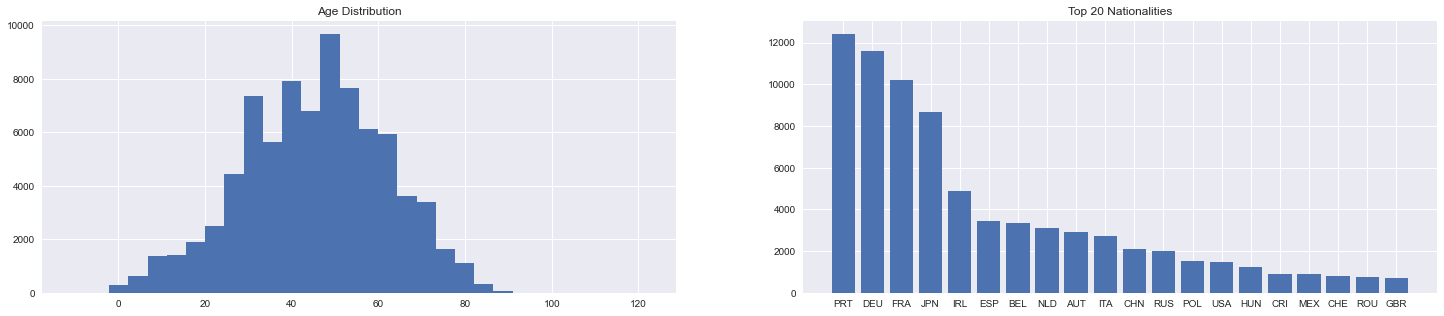

In [ ]:
#plot age and nationality
plt.style.use("seaborn")
figure, axis = plt.subplots(1,2, figsize = (25,5))

axis[0].hist(dataset["Age"], 30)
axis[0].set_title("Age Distribution")

axis[1].bar(dataset["Nationality"].unique()[0:20], dataset["Nationality"].value_counts()[0:20])
axis[1].set_title("Top 20 Nationalities")

plt.show()

Regarding **age**, a typical customer seems to be in the range of 40 to around 55 with a mean of roughly 45. The distribution looks aproximately normal with ages of 20 and below as well as 65 and above being much less common. 
In terms of **Nationality**, the hotel unexpectly attracts travellers from Portugal above everyone else. This is followed by Germany, France, Japan, and with some distance Ireland. Among the other top 20, several major nationalities are represented although the proportion of Europeans is equally high. 
### Part 3: Main Booking Statistics

In [3]:
#basic descriptive statistics
round(dataset[["LodgingRevenue", "OtherRevenue", "BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn", "PersonsNights", "RoomNights"]].describe())

,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
count,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0
mean,299.0,68.0,0.0,0.0,1.0,5.0,2.0
std,373.0,114.0,0.0,0.0,1.0,5.0,2.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,59.0,2.0,0.0,0.0,1.0,1.0,1.0
50%,234.0,38.0,0.0,0.0,1.0,4.0,2.0
75%,402.0,88.0,0.0,0.0,1.0,6.0,4.0
max,21781.0,7730.0,9.0,3.0,66.0,116.0,185.0


In [4]:
#absolute crosstab of whether or not the hotel reported any revenue for a customer
pd.crosstab(dataset["LodgingRevenue"] > 0, dataset["OtherRevenue"] > 0, margins = True)

OtherRevenue,False,True,All
LodgingRevenue,,,
False,20205,203,20408
True,9,63173,63182
All,20214,63376,83590


In [23]:
#relative crosstab of whether or not the hotel reported any revenue for a customer
round(pd.crosstab(dataset["LodgingRevenue"] > 0, dataset["OtherRevenue"] > 0, margins = True, normalize = "all"),4)*100

OtherRevenue,False,True,All
LodgingRevenue,,,
False,24.17,0.24,24.41
True,0.01,75.57,75.59
All,24.18,75.82,100.00


In [47]:
#frequency table for Booking Outcomes
freq = pd.DataFrame(range(dataset["BookingsCheckedIn"].max()))
freq.columns = ["index"]
checked_in = dataset["BookingsCheckedIn"].value_counts().sort_index().to_frame().reset_index()
canceled  = dataset["BookingsCanceled"].value_counts().sort_index().to_frame().reset_index()
noshowed = dataset["BookingsNoShowed"].value_counts().sort_index().to_frame().reset_index()

merged_df1 = freq.merge(checked_in, how = "left")
merged_df2 = merged_df1.merge(canceled, how = "left")
merged_final = merged_df2.merge(noshowed, how = "left")
merged_final.fillna(0, inplace = True)

merged_final[0:10]

,index,BookingsCheckedIn,BookingsCanceled,BookingsNoShowed
0,0,19920.0,83472.0,83546.0
1,1,62215.0,92.0,36.0
2,2,1147.0,12.0,7.0
3,3,132.0,8.0,1.0
4,4,59.0,5.0,0.0
5,5,20.0,0.0,0.0
6,6,20.0,0.0,0.0
7,7,16.0,0.0,0.0
8,8,10.0,0.0,0.0
9,9,9.0,1.0,0.0


In [61]:
#percentage of customers with 0 versus 1+ checkins
print((dataset["BookingsCheckedIn"] == 0).value_counts()/len(dataset["BookingsCheckedIn"]))

#percentage of customers with more than 1 checkin
print("\n", round(len(dataset["BookingsCheckedIn"][dataset["BookingsCheckedIn"] > 1])/len(dataset["BookingsCheckedIn"]),4))

False    0.761694
True     0.238306
Name: BookingsCheckedIn, dtype: float64

 0.0174


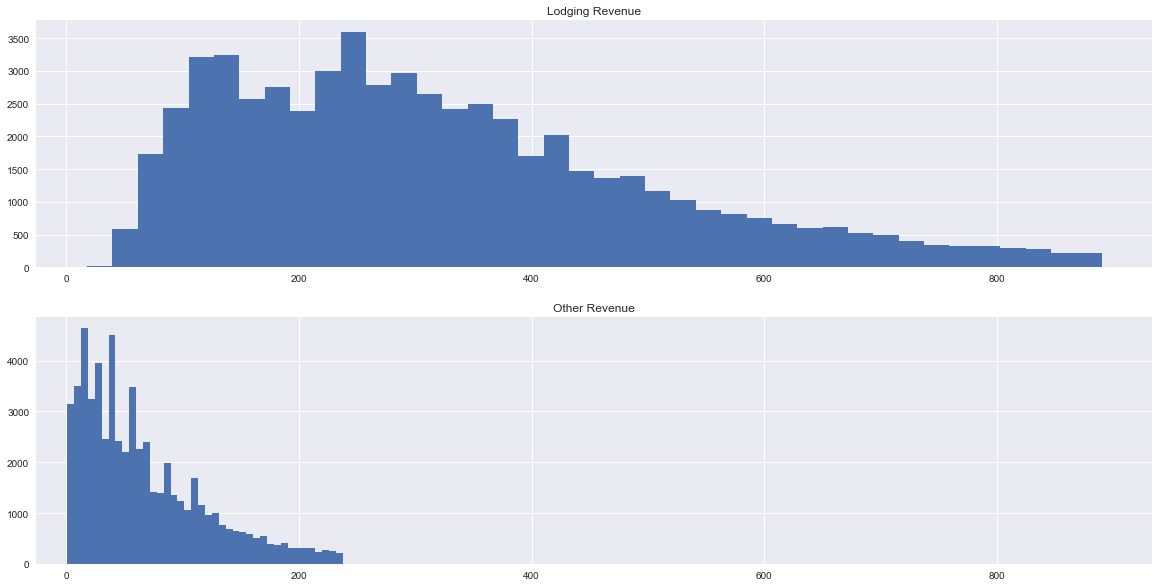

In [ ]:
#plot revenue
plt.style.use("seaborn")
figure, axis = plt.subplots(2,1, figsize = (20,10))

#exclude: customers where no revenue was obtained & everything above the 99th percentile
filtered_lrev = dataset["LodgingRevenue"][(dataset["LodgingRevenue"] < dataset["LodgingRevenue"].quantile(0.95)) & (dataset["LodgingRevenue"] > 0)]
filtered_orev = dataset["OtherRevenue"][(dataset["OtherRevenue"] < dataset["OtherRevenue"].quantile(0.95)) & (dataset["OtherRevenue"] > 0)]

axis[0].hist(filtered_lrev, 40)
axis[0].set_title("Lodging Revenue")

plt.setp(axis, xlim=axis[0].get_xlim())

axis[1].hist(filtered_orev,40)
axis[1].set_title("Other Revenue")

plt.show()

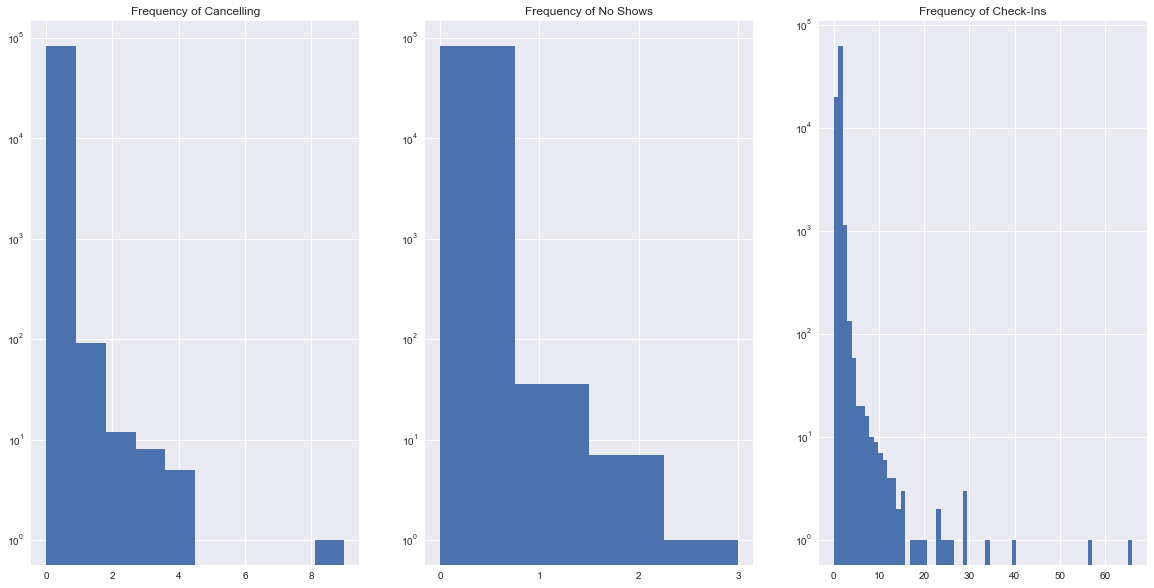

In [42]:
#plot bookings cancelled, no shows, and checkins
plt.style.use("seaborn")
figure, axis = plt.subplots(1,3, figsize = (20,10))

axis[0].hist(dataset["BookingsCanceled"],10)
axis[0].set_yscale("log")
axis[0].set_title("Frequency of Cancelling")

axis[1].hist(dataset["BookingsNoShowed"],4)
axis[1].set_yscale("log")
axis[1].set_xticks(ticks = [0,1,2,3])
axis[1].set_title("Frequency of No Shows")

axis[2].hist(dataset["BookingsCheckedIn"], 67)
axis[2].set_yscale("log")
axis[2].set_title("Frequency of Check-Ins")

plt.show()

In terms of **Revenue**, it should first be noted that the total Revenue consist of contributions from almost 76% of customers. Additionally, in almost all cases (> 99%), these individual contributions consisted of both lodging and other forms of revenue. In terms of magnitude, the revenue obtained from lodging is on average substantially higher than when obtained from other sources. Moreover, both variables show very extreme outliers; hence, the top 5% were excluded in both cases for the sake of visualisation. Notably, the Lodging Revenue shows some resemblance of symmetry while the Other Revenue decreases exponentially from the left. 
<br>
In terms of **Booking Outcomes**, around 76% of Customers have checked in at least once, although less than 2% checked in more than once. In other words, this hotel attracts very few repeat customers. On a positive note, the proportions of cancellations or no shows are both very low. Two notable customers are one person that cancelled a total of 9 times, as well as one person that did not show three times. 
<br>
In terms of the total nights customers have checked in for: 